Dataset created successfully.

Model Evaluation:
[[229   0]
 [  0  21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        21

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Accuracy: 100.0 %


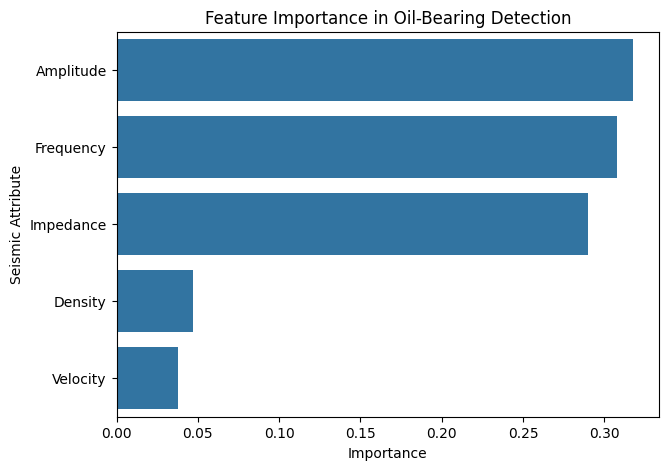

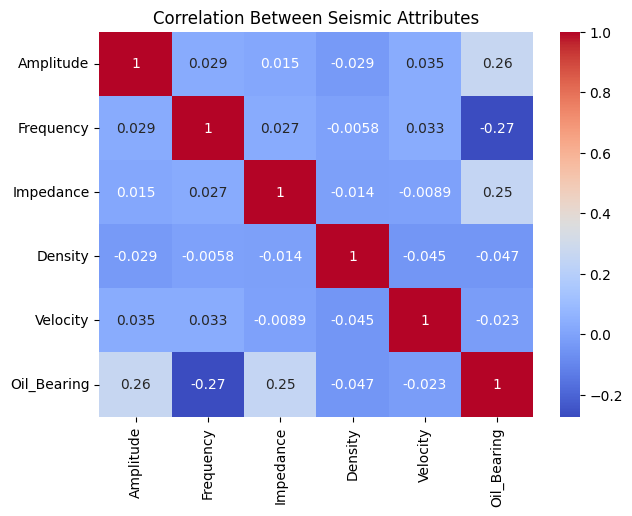

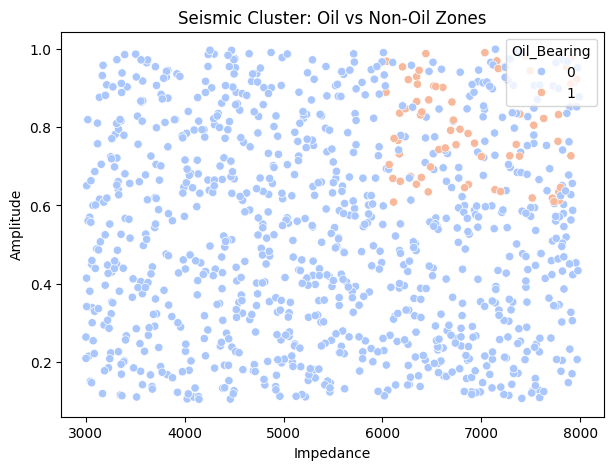


Model run completed. Oil-bearing regions identified.


In [1]:
# Oil-Bearing Zone Detection using Seismic Data
# Author: Bikrant Kumar Mishra
# Description:
# A simple Geo-AI experiment using seismic attributes to classify
# whether a region may be oil-bearing.

!pip install -q xgboost seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb


# Create synthetic seismic dataset
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    "Amplitude":  np.random.uniform(0.1, 1.0, n_samples),
    "Frequency":  np.random.uniform(10, 80, n_samples),
    "Impedance":  np.random.uniform(3000, 8000, n_samples),
    "Density":    np.random.uniform(2.0, 3.0, n_samples),
    "Velocity":   np.random.uniform(1500, 6000, n_samples)
})

# Basic domain rule: high impedance + moderate amplitude + low frequency
# often indicate potential oil-bearing zones
data["Oil_Bearing"] = np.where(
    (data["Impedance"] > 6000) &
    (data["Amplitude"] > 0.6) &
    (data["Frequency"] < 40),
    1, 0
)

print("Dataset created successfully.")
data.head()


# Split the data
X = data.drop("Oil_Bearing", axis=1)
y = data["Oil_Bearing"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


# Evaluate the model
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


# Plot feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Oil-Bearing Detection")
plt.xlabel("Importance")
plt.ylabel("Seismic Attribute")
plt.show()


# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Seismic Attributes")
plt.show()


# Oil vs non-oil zone visualization
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x="Impedance",
    y="Amplitude",
    hue="Oil_Bearing",
    data=data,
    palette="coolwarm"
)
plt.title("Seismic Cluster: Oil vs Non-Oil Zones")
plt.show()

print("\nModel run completed. Oil-bearing regions identified.")